# Data distributions and visualization

We'll use some data visualization tools to look at and interpret distributions of data.

In [2]:
import pandas as pd

### 1. Basic visualizations of distributions

Back to the weather data:

In [ ]:
weather = pd.read_csv('https://raw.githubusercontent.com/dlevine01/urban-data-analysis-course/refs/heads/main/Data/Source%20Data/weather_data_nyc_centralpark_2016.csv')

Applying the same fix as before to the 'precipitation' field 

In [ ]:
weather['precipitation_n'] = pd.to_numeric(weather['precipitation'],errors='coerce')

pandas has built-in plotting methods:

<Axes: ylabel='Frequency'>

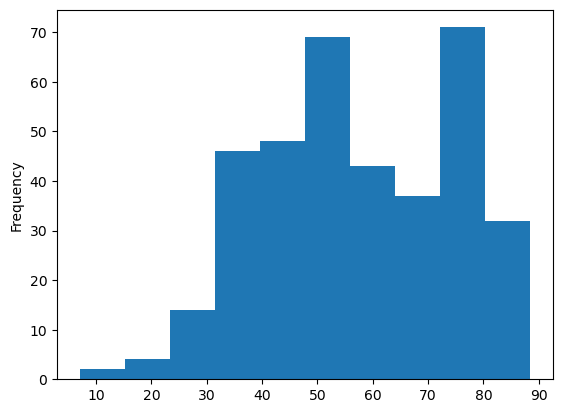

In [ ]:
weather['average temperature'].plot.hist()

<Axes: >

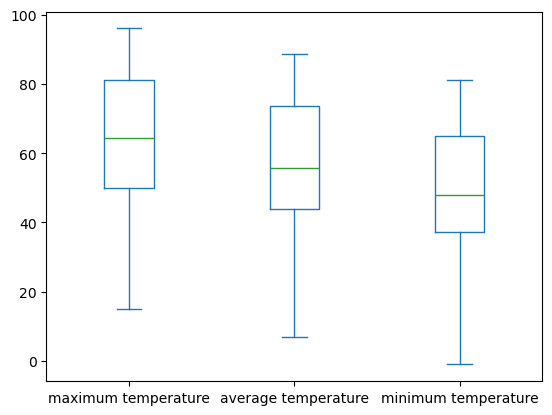

In [ ]:
weather[['maximum temperature','average temperature','minimum temperature']].plot.box()

<Axes: ylabel='Frequency'>

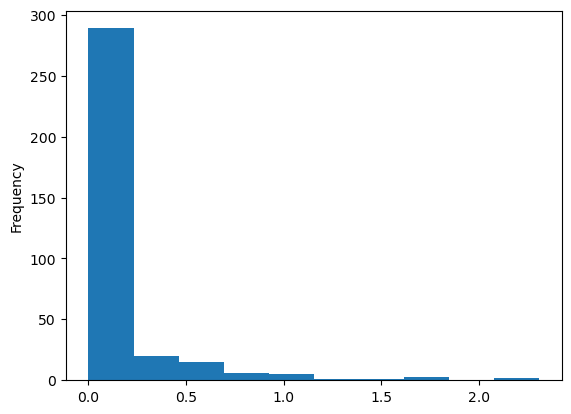

In [ ]:
weather['precipitation_n'].plot.hist()

The `seaborn` package offers additional plotting tools. It makes default charts look a little nicer, adds more options for customizing visualizations, and adds more types of charts. Seaborn's chart types are especially good for visualizing and comparing distributions.

We add a new package with the `import` statement. `sns` has been adopted as the standard abbreviation by the seaborn community. 

In [6]:
import seaborn as sns

seaborn (and pandas built-in plotting methods) build on a plotting package matplotlib. This package is almost boundlessly flexible, but has a cumbersome interface. But we'll import it, too, to be able to do a few extra formatting fixes.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Seaborn has plotting functions to create different types of charts. e.g. `sns.histplot()` creates a histogram. 
A basic call includes passing the dataframe to the `data=` argument and the column to plot to the `x=` argument:

<Axes: xlabel='average temperature', ylabel='Count'>

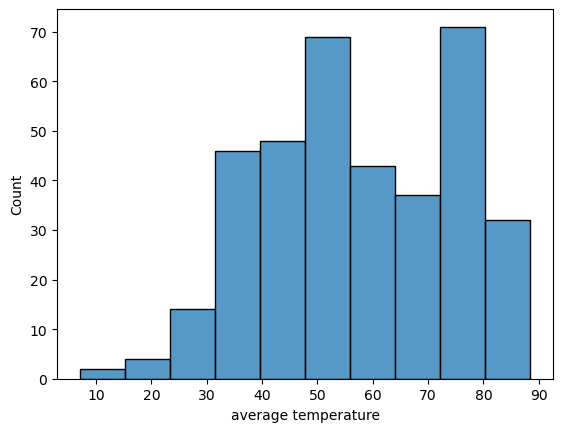

In [ ]:
sns.histplot(
    data=weather,
    x='average temperature',
)

There are additional options to adjust the view. E.g. we can set how many bins:

<Axes: xlabel='average temperature', ylabel='Count'>

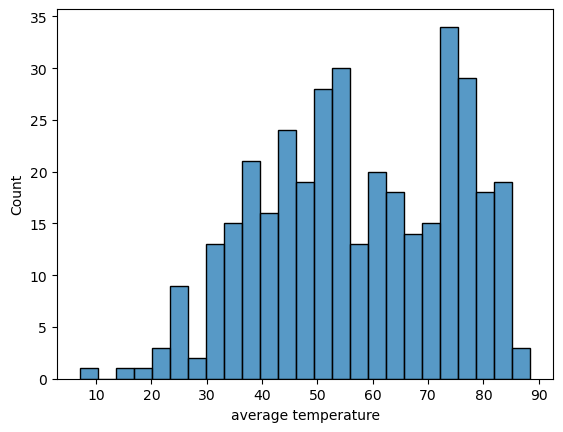

In [ ]:
sns.histplot(
    data=weather,
    x='average temperature',
    bins=25
)

Or fit a smooth curve over the data:

<Axes: xlabel='average temperature', ylabel='Count'>

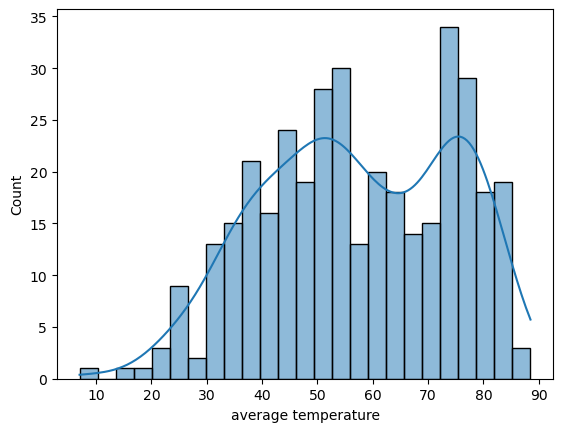

In [ ]:
sns.histplot(
    data=weather,
    x='average temperature',
    bins=25,
    kde=True
)

An alternative (with wide-form data) is to pass all relevant columns to the `data` argument. This will plot the columns side-by-side. 

<Axes: >

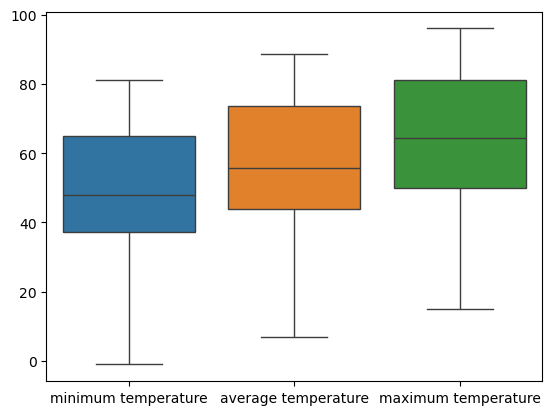

In [ ]:
sns.boxplot(
    data=weather[['minimum temperature','average temperature','maximum temperature']]
)

Passing multiple columns to a histplot layers the histograms.

<Axes: ylabel='Count'>

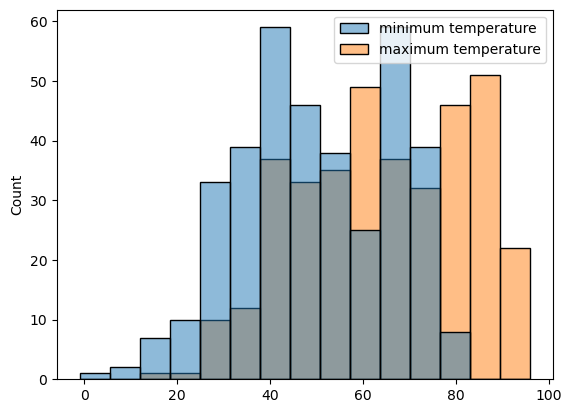

In [ ]:
sns.histplot(
    data=weather[['minimum temperature','maximum temperature']],
)

`histplot` always shows a histogram. `displot` is a more general function for various types of distribution plots. It handles the legend more neatly too:

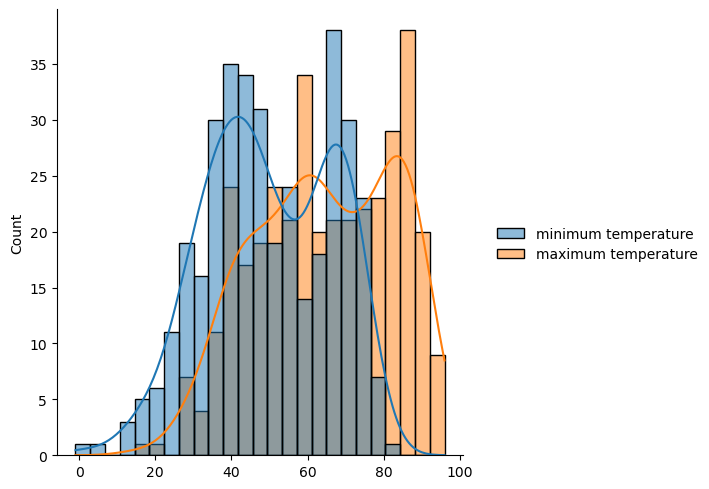

In [ ]:
sns.displot(
    data=weather[['minimum temperature','maximum temperature']],
    bins=25,
    kde=True
)

<Axes: ylabel='precipitation_n'>

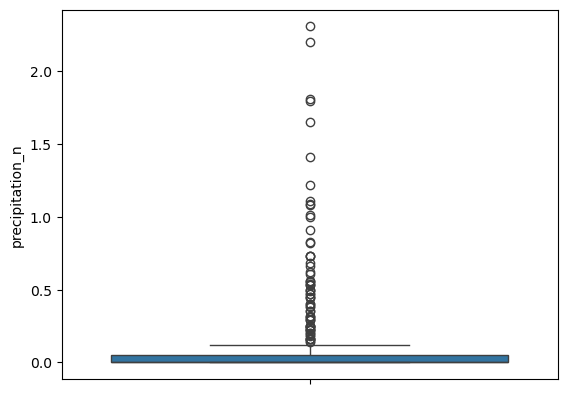

In [ ]:
sns.boxplot(
    data=weather,
    y='precipitation_n'
)

<Axes: xlabel='precipitation_n', ylabel='Count'>

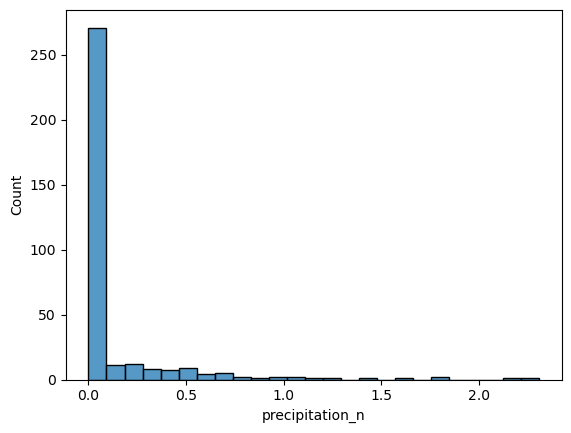

In [ ]:
sns.histplot(
    data=weather,
    x='precipitation_n',
    bins=25
)

## 2. Land use data

Let's look at distributions across some real NYC urban planning data.

PLUTO (Primary Land Use Tax Lot Output) is the parcel level, extensive land use data from NYC Department of Planning.
Available [here](https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-PLUTO-/64uk-42ks/data) or [here](https://www.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page).

This is a big dataset, so as a sample set I have extracted just the records within Manhattan Community District 8, the area surrounding Hunter College.

In [3]:
pluto = pd.read_csv('https://raw.githubusercontent.com/dlevine01/urban-data-analysis-course/refs/heads/main/Data/Source%20Data/Primary_Land_Use_Tax_Lot_Output__PLUTO__20250124.csv')

In [ ]:
pluto.head(10)

,borough,Tax block,Tax lot,community board,census tract 2010,cb2010,schooldist,council district,postcode,firecomp,...,landmkdate,basempdate,masdate,polidate,edesigdate,geom,dcpedited,notes,bct2020,bctcb2020
0,MN,1393,4,108,142.0,4001,2.0,4,10075.0,E022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1014200,10142004001
1,MN,1466,144,108,124.0,3000,2.0,5,10021.0,L016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124003000
2,MN,1467,1,108,124.0,2000,2.0,5,10021.0,E044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124002001
3,MN,1467,44,108,124.0,2000,2.0,5,10021.0,E044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124002001
4,MN,1467,5,108,124.0,2000,2.0,5,10021.0,E044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124002000
5,MN,1467,43,108,124.0,2000,2.0,5,10021.0,E044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124002001
6,MN,1465,40,108,124.0,4000,2.0,5,10021.0,L016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124004000
7,MN,1465,6,108,124.0,4000,2.0,5,10021.0,L016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124004000
8,MN,1465,38,108,124.0,4000,2.0,5,10021.0,L016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124004000
9,MN,1465,37,108,124.0,4000,2.0,5,10021.0,L016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124004000


Built FAR:

<Axes: xlabel='builtfar', ylabel='Count'>

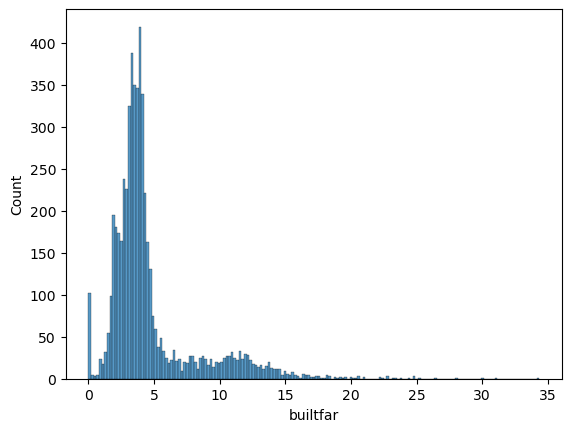

In [ ]:
sns.histplot(
    data=pluto,
    x='builtfar'
)

<Axes: xlabel='builtfar', ylabel='Count'>

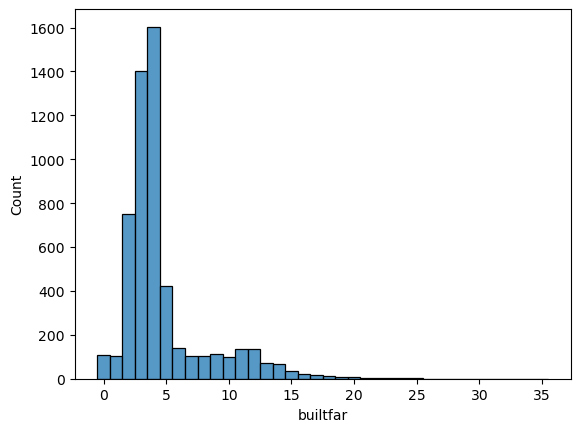

In [ ]:
sns.histplot(
    data=pluto,
    x='builtfar',
    discrete=True
)

Total assessed value:

<Axes: xlabel='assesstot', ylabel='Count'>

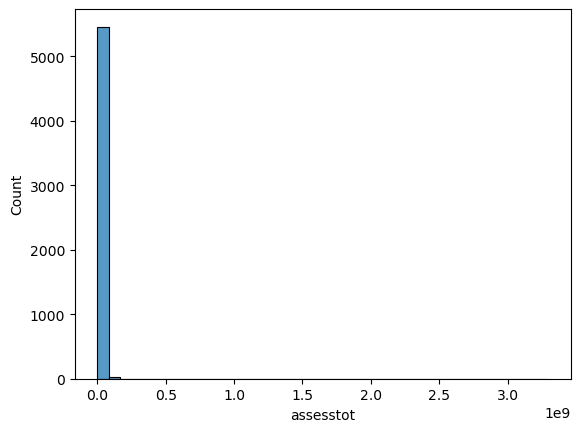

In [ ]:
sns.histplot(
    data=pluto,
    x='assesstot',
    bins=40
)

# to reformat the x axis from scientific notation
# ax = plt.gca().xaxis
# ax.set_major_formatter(ticker.FuncFormatter(lambda val, pos: f'${val / 1_000_000_000:,.1f}B'))
# ax.set_label_text('assessed total (billions)')


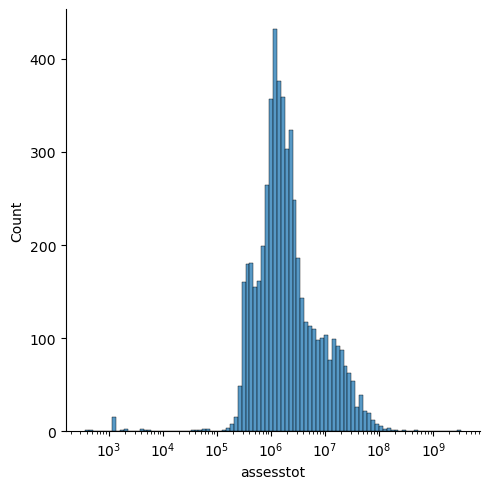

In [11]:

sns.displot(
    pluto,
    x='assesstot',
    log_scale=True
)


<Axes: ylabel='assesstot'>

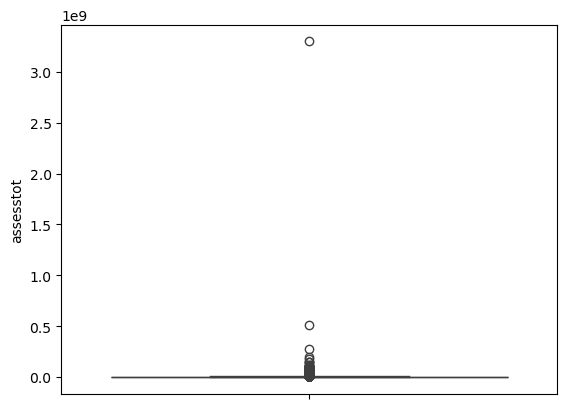

In [ ]:
sns.boxplot(
    data=pluto,
    y='assesstot'
)

Holy outlier! What is that?

In [ ]:
(
    pluto
    .loc[
        pluto['assesstot'].idxmax()
    ]
    ['address']
)

'1000 5 AVENUE'

What are the other high-value properties?

In [ ]:
(
    pluto
    .sort_values('assesstot', ascending=False)
    .head(10)
    .set_index('address')
    [['assesstot']]
    .map('${:,.0f}'.format) # format as dollar amounts with thoudands commas
)

,assesstot
address,
1000 5 AVENUE,"$3,296,988,450"
MAIN STREET,"$509,155,650"
1176 YORK AVENUE,"$273,574,350"
650 MADISON AVENUE,"$198,693,000"
590 EAST 68 STREET,"$175,113,450"
530 EAST 74 STREET,"$153,780,300"
437 EAST 68 STREET,"$151,503,750"
411 EAST 68 STREET,"$146,207,700"
200 EAST 66 STREET,"$125,584,003"


We can filter some out to better see the rest.

In [4]:
THRESHOLD = 1_000_000_000

pluto_less_than_threshold = (
    pluto
    [
        pluto['assesstot'].lt(THRESHOLD)
    ]
)

<Axes: ylabel='assesstot'>

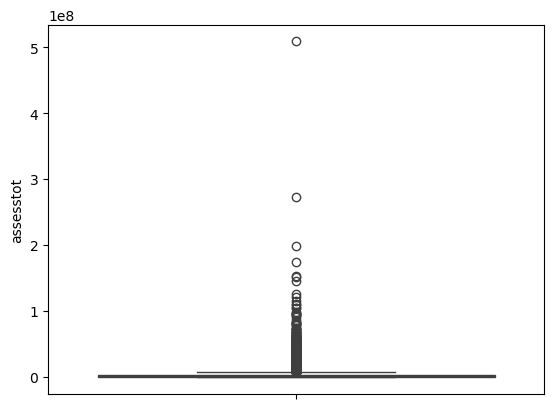

In [7]:

sns.boxplot(
    pluto_less_than_threshold,
    y='assesstot'
)


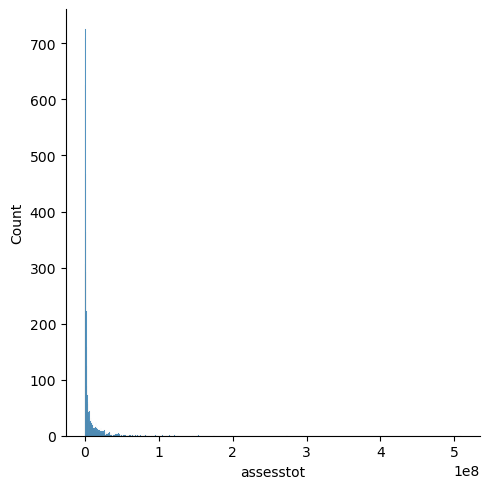

In [8]:

sns.displot(
    pluto_less_than_threshold,
    x='assesstot'
)


Let's say we are analyzing the existing built density for City Council and want to compare built FAR across City Council districts.

Which council districts cover this neighborhood? (https://council.nyc.gov/map-widget/)

In [ ]:
pluto['council district'].value_counts()

council district
5    3287
4    2161
8      38
Name: count, dtype: int64

<Axes: xlabel='council district', ylabel='count'>

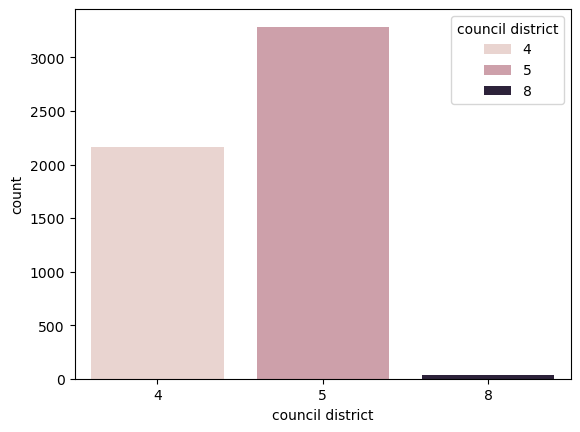

In [ ]:
sns.countplot(
    data=pluto,
    x='council district',
    hue='council district'
)

We can change the council district column to a str so seaborn will recognize these data are categorical

In [17]:
pluto['council district'] = pluto['council district'].astype(str)

<Axes: xlabel='council district', ylabel='count'>

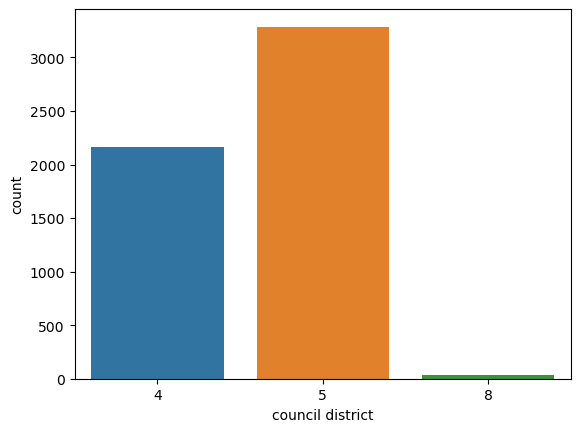

In [ ]:
sns.countplot(
    data=pluto,
    x='council district',
    hue='council district'
)

Most of this area falls in districts 4 and 5

In [18]:
pluto_4_5 = (
    pluto
    [
        pluto['council district'].isin(['4','5'])
    ]
)

In [20]:
(
    pluto_4_5
    .groupby('council district')
    ['builtfar']
    .agg(['mean','median','std'])
)

,mean,median,std
council district,,,
4,5.124632,3.77,3.655975
5,4.449842,3.68,3.355530


<Axes: xlabel='builtfar', ylabel='Count'>

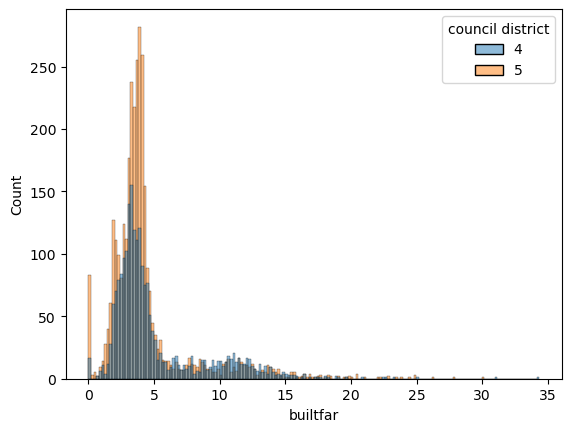

In [113]:
sns.histplot(
    data=pluto_4_5,
    x='builtfar',
    hue='council district',
)

<Axes: xlabel='builtfar', ylabel='Count'>

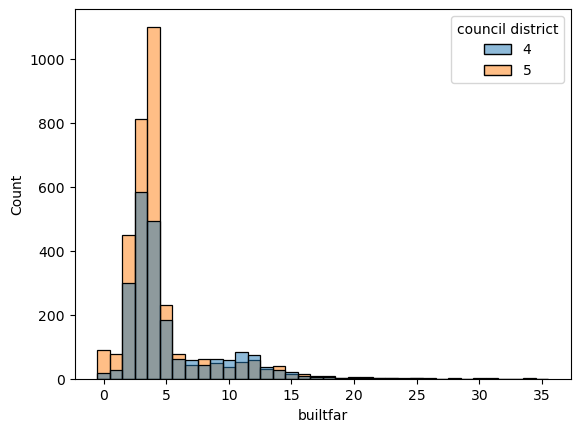

In [114]:
sns.histplot(
    data=pluto_4_5,
    x='builtfar',
    hue='council district',
    discrete=True
)

With unbalanced groups, the relative proportions may be hard to see when plotting counts. We can intead plot the proportion within each group.

<Axes: xlabel='builtfar', ylabel='Proportion'>

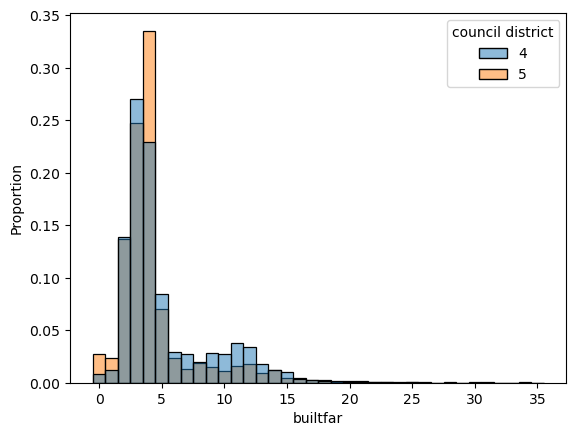

In [116]:
sns.histplot(
    data=pluto_4_5,
    x='builtfar',
    hue='council district',
    discrete=True,
    stat='proportion',
    common_norm=False

)

<Axes: xlabel='builtfar', ylabel='Proportion'>

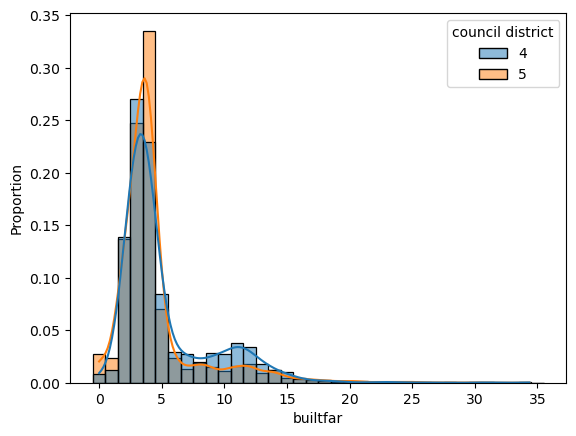

In [119]:
sns.histplot(
    data=pluto_4_5,
    x='builtfar',
    hue='council district',
    discrete=True,
    stat='proportion',
    common_norm=False,
    kde=True
)

<Axes: ylabel='builtfar'>

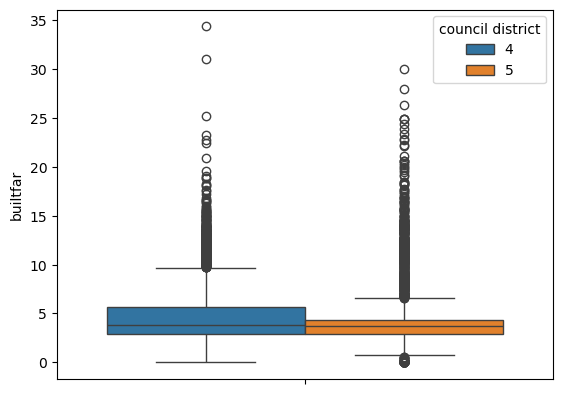

In [120]:
sns.boxplot(
    data=pluto_4_5,
    y='builtfar',
    hue='council district',

)

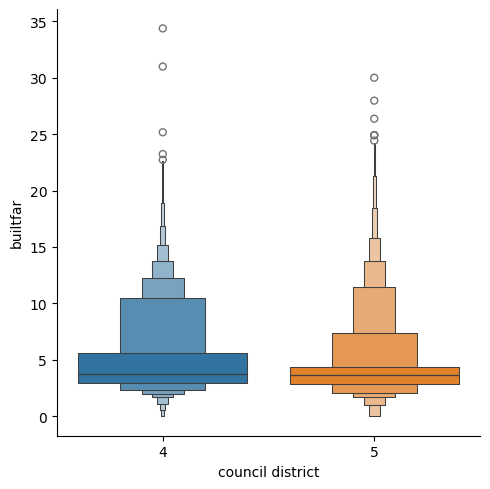

In [131]:
(
    pluto_4_5
    .pipe(
        sns.catplot,
        y='builtfar',
        x='council district',
        hue='council district',
        kind='boxen'
    )
)

Bonus: Let's say we want to compare built FAR by zoning type

In [151]:
pluto['zonedist1']

0        R10
1       R10A
2       R10A
3        R8B
4       R10A
        ... 
5481     NaN
5482    C1-9
5483     R8B
5484     R8B
5485     R8B
Name: zonedist1, Length: 5486, dtype: object

In [159]:
pluto['zone type'] = pluto['zonedist1'].str.slice(stop=1)

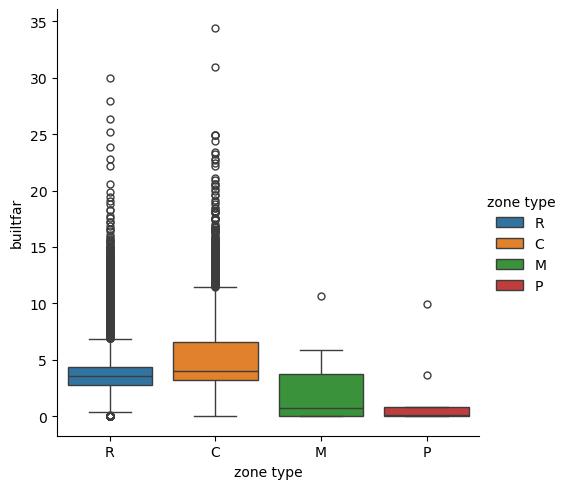

In [160]:
sns.catplot(
    data=pluto_4_5,
    y='builtfar',
    x='zone type',
    hue='zone type',
    kind='box'
)

In [163]:
pluto_4_5

,borough,Tax block,Tax lot,community board,census tract 2010,cb2010,schooldist,council district,postcode,firecomp,...,basempdate,masdate,polidate,edesigdate,geom,dcpedited,notes,bct2020,bctcb2020,zone type
0,MN,1393,4,108,142.0,4001,2.0,4,10075.0,E022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1014200,10142004001,R
1,MN,1466,144,108,124.0,3000,2.0,5,10021.0,L016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124003000,R
2,MN,1467,1,108,124.0,2000,2.0,5,10021.0,E044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124002001,R
3,MN,1467,44,108,124.0,2000,2.0,5,10021.0,E044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124002001,R
4,MN,1467,5,108,124.0,2000,2.0,5,10021.0,E044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012400,10124002000,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,MN,1473,9042,108,132.0,1000,2.0,5,10075.0,E022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1013203,10132032000,NaN
5482,MN,1453,25,108,134.0,3000,2.0,5,10075.0,E022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1013400,10134003000,C
5483,MN,1488,60,108,132.0,7000,2.0,5,10075.0,E044,...,NaN,NaN,NaN,NaN,NaN,t,NaN,1013202,10132021000,R
5484,MN,1399,27,108,120.0,2001,2.0,4,10065.0,E039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012000,10120002001,R


## 3. Spot and remove outliers and erroneous values

In [60]:
trees = pd.read_csv('https://data.cityofnewyork.us/api/views/hn5i-inap/rows.csv?accessType=DOWNLOAD')

In [61]:
trees.head()

,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location
0,159275,18.0,Full,Good,NaN,2CD3077B-6C1D-4935-A9F7-AB917AA5B88A,POINT (-74.1559337115944999 40.5320393194163913),028C5A6D-E883-403F-8848-3297F4F4A913,Acer - maple,2015-07-23 16:13:31.0000000,NaN,NaN,NaN,NaN,POINT (-74.1559337115945 40.53203931941639)
1,130446,22.0,Full,Good,NaN,24F9158E-D726-46BC-BB7A-20F96D9F3770,POINT (-74.1496407216266817 40.5367998358226984),58E9906F-ED05-4664-A078-A16685772B3A,Acer - maple,2015-04-03 04:00:00.0000000,NaN,NaN,NaN,NaN,POINT (-74.14964072162668 40.5367998358227)
2,595794,5.0,Full,Good,0.0,AF608674-A787-4288-BD33-38D668ED61CC,POINT (-73.8300251559162461 40.7722579385335919),C65B0D74-54A8-4042-80BE-7F5AFBA03595,Morus - mulberry,2015-08-25 11:34:17.0000000,NaN,NaN,NaN,NaN,POINT (-73.83002515591625 40.77225793853359)
3,1049614,0.0,Full,Dead,0.0,D6F8F966-41F5-45CC-8FDB-A76C92D6223E,POINT (-73.9555070666200720 40.7693729351457819),D292A11B-5A14-4752-A7B7-92B3D186D245,Unknown - Unknown,2015-10-01 13:35:47.0000000,NaN,NaN,NaN,NaN,POINT (-73.95550706662007 40.76937293514578)
4,1391532,0.0,Stump,Unknown,14.0,80BFF9AB-4C2C-43DB-87BD-CECA75353381,POINT (-73.7674208174912991 40.7590889708669977),6251B8EF-5B99-4664-9823-81B7A32B1C6E,Unknown - Unknown,2015-10-29 12:27:16.0000000,NaN,NaN,NaN,NaN,POINT (-73.7674208174913 40.759088970867)


In [63]:
(
    trees['GenusSpecies']
    .value_counts()
    .head(10)
)

GenusSpecies
Platanus x acerifolia - London planetree                                  112601
Gleditsia triacanthos var. inermis - Thornless honeylocust                 77531
Quercus palustris - pin oak                                                75583
Pyrus calleryana - Callery pear                                            65138
Acer platanoides - Norway maple                                            46695
Zelkova serrata - Japanese zelkova                                         37515
Unknown - Unknown                                                          37268
Tilia cordata - littleleaf linden                                          36706
Prunus serrulata 'Green leaf' - 'Green leaf' Japanese flowering cherry     29357
Acer rubrum - red maple                                                    25691
Name: count, dtype: int64

'DBH' is "diameter at breast height", a standard measure for the size of the tree.

Let's take a look at the range of sizes:

<Axes: xlabel='DBH', ylabel='Count'>

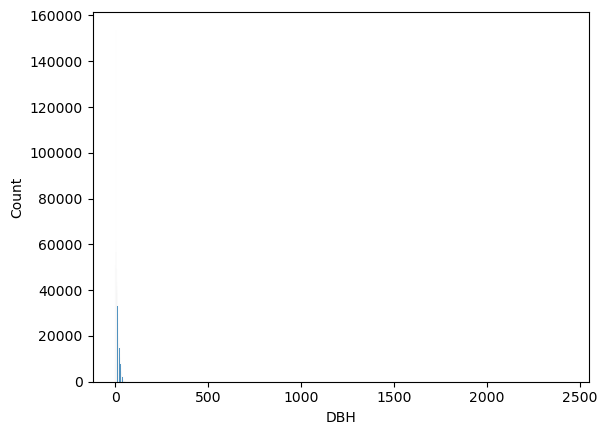

In [67]:
(
    sns.histplot(
        data=trees,
        x='DBH'
    )
)

<Axes: ylabel='DBH'>

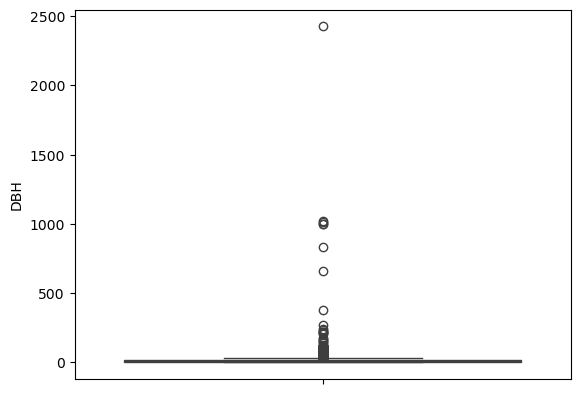

In [68]:
(
    sns.boxplot(
        data=trees,
        y='DBH',
    )
)

Well, this looks odd.

A histogram plot like this, with a very long x-axis but most of the data clustered at one end; or a box plot like this, with individual values far from the median, indicates there are outlier values in the data. Those might be valid, unusual instances in the data or might be errors that should be fixed or removed.

In [69]:
trees['DBH'].max()

2427.0

Let's assume there is not a tree 200 feet around in NYC and say this is an error in the data.

In [70]:
trees['DBH'].sort_values(ascending=False).head(20)

77644      2427.0
157849     1022.0
410150     1017.0
975015     1000.0
109984     1000.0
311462      830.0
326716      660.0
278987      380.0
660616      272.0
694133      244.0
60255       234.0
220586      222.0
426077      221.0
569998      219.0
552449      212.0
1035457     205.0
25          177.0
1008046     170.0
975083      160.0
345411      155.0
Name: DBH, dtype: float64

Looking at the top values, though, it's not clear where the cutoff is exactly for valid values.

In [71]:
trees.sort_values(by='DBH', ascending=False).head(20)

,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location
77644,1268531,2427.0,Full,Fair,NaN,ADF6D104-CD34-4299-809D-1804D08D5FA8,POINT (-73.9642641671727574 40.6590566200184895),9D697F14-27B1-4567-A852-845985AD7666,Quercus rubra - northern red oak,2015-10-21 14:14:42.0000000,2022-09-22 14:15:01.0000000,NaN,8.0,2022-09-22 14:15:01.0000000,POINT (-73.96426416717276 40.65905662001849)
157849,1457902,1022.0,Retired,Dead,0.0,514FCDA0-641B-4C65-8B01-A6C5D095E2F0,POINT (-74.0913045038123954 40.5986277356284830),59E065B2-0DAB-484E-823C-AFE32538723B,Platanus x acerifolia - London planetree,2015-10-30 12:12:00.0000000,2017-06-05 14:02:00.0000000,NaN,NaN,NaN,POINT (-74.0913045038124 40.59862773562848)
410150,2925926,1017.0,Retired,Dead,0.0,3A9A3AE2-F9DD-4CDA-A465-275E800CB504,POINT (-74.0670416334572224 40.5970688617357993),267522F7-D4FE-448A-8FE5-34E4D48746A9,Acer platanoides - Norway maple,2016-03-15 16:29:00.0000000,2017-11-21 04:11:11.0000000,NaN,10.0,2016-09-05 12:32:05.0000000,POINT (-74.06704163345722 40.5970688617358)
975015,11588905,1000.0,Stump,Unknown,13.0,0F6E7B7F-D50C-4B84-B9C8-BE5D3A4A8CF4,POINT (-73.9466997404111339 40.5767868387798245),C55EF847-55F7-4F88-AA73-05388A21BA03,Unknown - Unknown,2021-06-02 16:41:13.0000000,2021-09-30 13:45:19.0000000,NaN,NaN,NaN,POINT (-73.94669974041113 40.576786838779825)
109984,1421309,1000.0,Retired,Unknown,17.0,9D0C6799-D774-478E-9633-065222425D38,POINT (-73.8773878353767799 40.7228814891829387),267BA48E-203C-417A-8AF2-B89069F8895A,Unknown - Unknown,2015-10-29 14:11:17.0000000,NaN,NaN,NaN,NaN,POINT (-73.87738783537678 40.72288148918294)
311462,2549650,830.0,Full,Fair,NaN,F281112E-EBF8-4827-9919-1C17701164B5,POINT (-73.9614709993496859 40.6037340575437042),13768C22-6156-4C94-841A-8A330ED924F6,Tilia americana - American basswood,2016-02-12 15:32:25.0000000,2023-09-07 21:23:32.0000000,NaN,5.0,2023-09-07 21:23:32.0000000,POINT (-73.96147099934969 40.603734057543704)
326716,2554542,660.0,Retired,Unknown,0.0,AE5FA775-DD38-45F0-B61C-908314E006D0,POINT (-73.9141849556306880 40.6385214493644753),A3E3745C-84BF-44C1-8A42-849822B2E2AB,Platanus x acerifolia - London planetree,2016-02-12 16:00:00.0000000,2020-05-26 15:00:00.0000000,NaN,7.0,2017-09-29 12:27:00.0000000,POINT (-73.91418495563069 40.638521449364475)
278987,2431488,380.0,Retired,Unknown,17.0,7E16F5D0-BFDE-4BFF-BF21-DE071F8CE93B,POINT (-74.0047183380169145 40.6544187618920603),85AAAF77-6810-4DD3-8BCA-500BDC614C11,Platanus x acerifolia - London planetree,2016-01-05 19:35:00.0000000,2020-05-26 15:00:00.0000000,NaN,9.0,2019-05-02 12:05:00.0000000,POINT (-74.00471833801691 40.65441876189206)
660616,4657949,272.0,Full,Good,NaN,F9176745-DB9E-4A6E-AC51-1F818B86F8CC,POINT (-73.9945446185874118 40.6216495013531755),E2235D20-8040-4A2E-94BE-D229CC4A4720,Platanus x acerifolia - London planetree,2016-11-02 16:59:52.0000000,2023-10-16 17:16:24.0000000,NaN,4.0,2023-10-16 17:16:24.0000000,POINT (-73.99454461858741 40.621649501353176)
694133,4687136,244.0,Full,Good,NaN,6E27D5A2-6BBC-455D-98AA-7AAB53E0E22E,POINT (-73.9199791163312483 40.6539150513496992),E605CA46-8B78-4015-8C2C-21CC37E28E1D,Platanus x acerifolia - London planetree,2016-11-02 16:59:52.0000000,2024-08-07 18:02:52.0000000,NaN,9.0,2024-08-07 18:02:52.0000000,POINT (-73.91997911633125 40.6539150513497)


One approach is to filter out outliers based on a set value.

(It's good practice to give this fixed threshold value a name by defining it as a variable, so you know what it means and can adjust the value later if need be. In typical Python coding style, constant values like these are given names in all caps)

In [72]:
MAXIMUM_DBH = 200

trees_filtered_to_max_dbh = (
    trees
    [
        trees['DBH'].lt(MAXIMUM_DBH)
    ]
)

Another approach is to filter out values above a certain quantile.

You can check the values at specific quantile thresholds (here, 90%, 99%, 99.9%, and 99.99%):

In [73]:
trees['DBH'].quantile([0.9, 0.99, 0.999, 0.9999])

0.9000    25.0000
0.9900    39.0000
0.9990    52.0000
0.9999    73.3925
Name: DBH, dtype: float64

And pick a quantile threshold to filter.

In [74]:
DBH_QUANTILE_FILTER = 0.999

trees_filtered_by_quantile = (
    trees
    [
        trees['DBH'].lt(trees['DBH'].quantile(DBH_QUANTILE_FILTER))
    ]
)

Filtering out the outlier values gives us a better view of the more typical values.

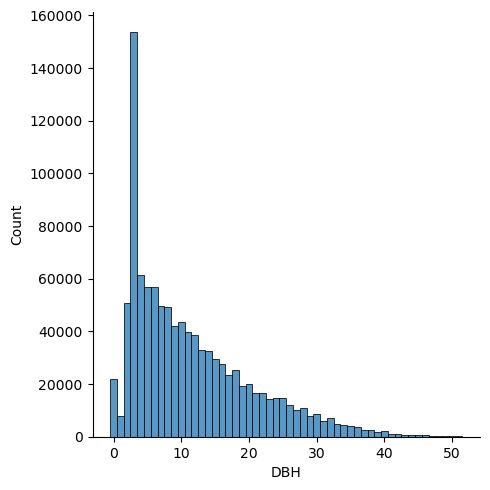

In [75]:
(
    sns.displot(
        data=trees_filtered_by_quantile,
        x='DBH',
        discrete=True # bin by whole numbers
    )
)

<Axes: ylabel='DBH'>

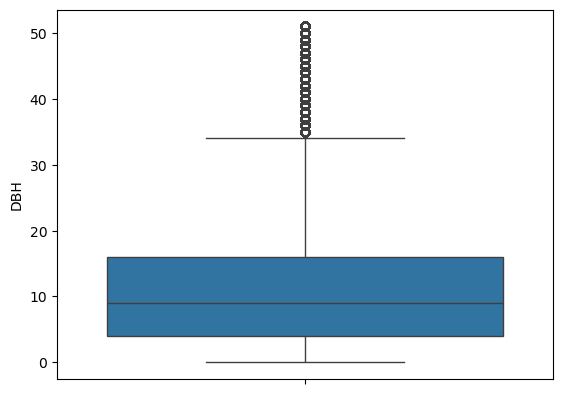

In [76]:
(
    sns.boxplot(
        data=trees_filtered_by_quantile,
        y='DBH',
    )
)

If you look carefully at the histogram, you can spot another potential data problem: too many zeros

It is common in real measurements like these to have more zeros than other values, but they may also represent errors in the data, or true representations of examples we are not interested in (here, trees with diameter zero are not trees at all but stumps)

In [77]:
(
    trees_filtered_by_quantile
    [
        trees_filtered_by_quantile['DBH'].eq(0)
    ]
)

,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location
3,1049614,0.0,Full,Dead,0.0,D6F8F966-41F5-45CC-8FDB-A76C92D6223E,POINT (-73.9555070666200720 40.7693729351457819),D292A11B-5A14-4752-A7B7-92B3D186D245,Unknown - Unknown,2015-10-01 13:35:47.0000000,NaN,NaN,NaN,NaN,POINT (-73.95550706662007 40.76937293514578)
4,1391532,0.0,Stump,Unknown,14.0,80BFF9AB-4C2C-43DB-87BD-CECA75353381,POINT (-73.7674208174912991 40.7590889708669977),6251B8EF-5B99-4664-9823-81B7A32B1C6E,Unknown - Unknown,2015-10-29 12:27:16.0000000,NaN,NaN,NaN,NaN,POINT (-73.7674208174913 40.759088970867)
5,1391309,0.0,Stump,Unknown,14.0,6BA1BFD4-81AA-4F84-9973-79C7A975C82A,POINT (-73.8339464025424235 40.7454174338084272),BA1EEB37-4743-4682-A52C-64E64F38345B,Unknown - Unknown,2015-10-29 12:26:27.0000000,NaN,NaN,NaN,NaN,POINT (-73.83394640254242 40.74541743380843)
27,3765009,0.0,Stump,Unknown,38.0,C3F1538C-9F02-4B57-A609-4CA9A70CE8BB,POINT (-73.7266601100364625 40.6712150996995376),C0584824-0479-444A-A544-302FAB997230,Unknown - Unknown,2016-06-21 16:25:03.0000000,NaN,NaN,NaN,NaN,POINT (-73.72666011003646 40.67121509969954)
64,189128,0.0,Retired,Dead,18.0,B3D3A695-A099-4726-AA2F-E8DC167AADFC,POINT (-73.7636038754633887 40.6640357040017619),74C18C5D-EB32-40CC-8D72-1B4098F1AC93,Acer platanoides - Norway maple,2015-05-15 13:23:00.0000000,2017-11-14 13:25:00.0000000,NaN,NaN,NaN,POINT (-73.76360387546339 40.66403570400176)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072955,15921880,0.0,Stump,Good,6.0,43525C26-A0D0-4BB8-88E7-3FEAFCE65332,POINT (-73.7709566083797625 40.8595759468387669),61B41C99-B37F-43FB-8C46-3C1BB841C527,NaN,2024-12-17 20:37:22.0000000,NaN,NaN,NaN,NaN,POINT (-73.77095660837976 40.85957594683877)
1073486,15921870,0.0,Stump,Dead,7.0,7036B5BE-991A-4512-92E0-5289F53BA95B,POINT (-73.7703038585454749 40.8593619290652654),C864957B-BFCD-4B31-B1C8-BCF01CE5186B,Populus deltoides - eastern cottonwood,2024-12-17 20:37:22.0000000,NaN,NaN,NaN,NaN,POINT (-73.77030385854547 40.859361929065265)
1073489,15921835,0.0,Stump,Dead,24.0,89FD58DE-9F34-41A1-831A-2AFE379862BB,POINT (-73.7695121289878557 40.8520138083443243),789E1BCC-FEB7-482B-93EB-38ED141C9178,Unknown - Unknown,2024-12-17 20:37:22.0000000,NaN,NaN,NaN,NaN,POINT (-73.76951212898786 40.852013808344324)
1073953,15921860,0.0,Stump,Dead,6.0,663E2C95-8943-4FD9-AF40-55E3BD2B0EC8,POINT (-73.7713960873186636 40.8578323795826464),91D40F1A-42DB-4CE4-869E-9DE6E40AAF72,Unknown - Unknown,2024-12-17 20:37:22.0000000,NaN,NaN,NaN,NaN,POINT (-73.77139608731866 40.857832379582646)


let's remove these trees as well, to keep just the trees with a measured, non-zero diameter

In [78]:
trees_filtered = (
    trees_filtered_by_quantile
    [
        trees_filtered_by_quantile['DBH'].notna()
        &
        trees_filtered_by_quantile['DBH'].gt(0)
    ]
)

After removing these outliers and samples we are not interested in, how many trees are left in our data?

In [79]:
# how many we started with

len(trees)

1075875

In [80]:
# home many we filtered to

len(trees_filtered)

1033024

And then check the summary of corrected data

<Axes: xlabel='DBH', ylabel='Count'>

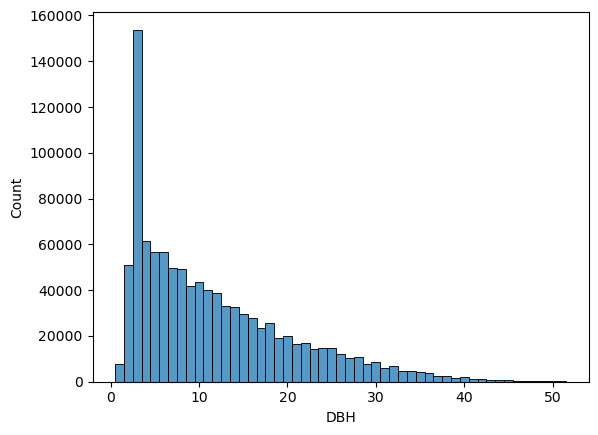

In [85]:
sns.histplot(
    data=trees_filtered,
    x='DBH',
    discrete=True
)

<Axes: ylabel='DBH'>

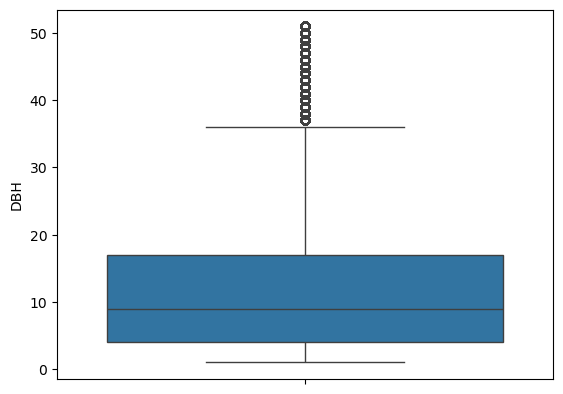

In [83]:
sns.boxplot(
    data=trees_filtered,
    y='DBH'
)

In [82]:
(
    trees_filtered['GenusSpecies']
    .value_counts()
    .head(10)
)

GenusSpecies
Platanus x acerifolia - London planetree                                  110445
Gleditsia triacanthos var. inermis - Thornless honeylocust                 76877
Quercus palustris - pin oak                                                74108
Pyrus calleryana - Callery pear                                            63462
Acer platanoides - Norway maple                                            42043
Zelkova serrata - Japanese zelkova                                         36992
Tilia cordata - littleleaf linden                                          35340
Prunus serrulata 'Green leaf' - 'Green leaf' Japanese flowering cherry     28822
Ginkgo biloba - maidenhair tree                                            25103
Acer rubrum - red maple                                                    24916
Name: count, dtype: int64

# Tasks

1. Plot the number of trees of each of the top 10 species (after filtering diameter)


In [ ]:
## your code

2. Using a boxplot, plot the distribution of diameter sizes of each of the 10 most common species


In [ ]:
## your code

3. Using a layered histogram, plot the diameters of trees in "Good" and "Fair" conditions.
   1. What do these distributions tell you about the sizes of trees in these conditions?


In [ ]:
## your code

4. Compare the distributions of assessed total values of properties in each of the three most common special zoning districts (`spdist1`)
   1. Which special district has properties with the most concentrated property values?
   2. Which special district has the most heterogenous/dispersed property values?

In [ ]:
## your code